# Defining and Training SLP

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.callbacks import EarlyStopping
metrics = {}
import random

Using TensorFlow backend.


In [2]:
def get_imageset(datadir):
    
    #converts the given images into numpy arrays that can be feeded into the perceptron
    images = sorted([img_name for img_name in os.listdir(datadir) if img_name!=".DS_Store"])
    matrix = np.array([np.array(Image.open(datadir+each_img).convert('L')) for each_img in images])
    matrix = np.where(matrix<np.mean(matrix),0,1).astype('float64')
    return matrix

In [3]:
X_train = get_imageset("../dataset/train/")
X_test = get_imageset("../dataset/test/")

print(X_train.shape,X_test.shape,X_test.dtype,X_train.dtype)

(10, 16, 16) (20, 16, 16) float64 float64


In [4]:
#Flattening the input data
X_train= X_train.reshape(X_train.shape[0],1,256)
X_test = X_test.reshape(X_test.shape[0],1,256)

# Perceptron Model Definition

In [5]:
# Fully connected input layer with 256*256 weights
# Number of bias: 256
# Number of Output Nodes: 256

model = Sequential()
model.add(Dense(256, activation='sigmoid', input_shape=(1,256)))
model.add(Dense(256, activation='sigmoid'))
model.compile(loss='mean_squared_error',optimizer='adam')
# Diplay the model summary
print("model summary")
model.summary()
print("Shapes of weights and bias arrays")
for x in range(0,len(model.layers) - 1):
    print(model.get_layer(index=x+1).get_weights()[0].shape)
    print(model.get_layer(index=x+1).get_weights()[1].shape)
earlystopper = EarlyStopping(monitor='val_loss', mode='min',patience=2) 

Instructions for updating:
Colocations handled automatically by placer.
model summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1, 256)            65792     
_________________________________________________________________
dense_2 (Dense)              (None, 1, 256)            65792     
Total params: 131,584
Trainable params: 131,584
Non-trainable params: 0
_________________________________________________________________
Shapes of weights and bias arrays
(256, 256)
(256,)


In [26]:
#Training the model
results = model.fit(X_train,X_train, validation_split=0.1, epochs=350)

Train on 9 samples, validate on 1 samples
Epoch 1/350
9/9 [==============================] - 1s 105ms/step - loss: 0.2664 - val_loss: 0.2418
Epoch 2/350
9/9 [==============================] - 0s 1ms/step - loss: 0.2453 - val_loss: 0.2286
Epoch 3/350
9/9 [==============================] - 0s 1ms/step - loss: 0.2269 - val_loss: 0.2177
Epoch 4/350
9/9 [==============================] - 0s 1ms/step - loss: 0.2113 - val_loss: 0.2089
Epoch 5/350
9/9 [==============================] - 0s 1ms/step - loss: 0.1980 - val_loss: 0.2019
Epoch 6/350
9/9 [==============================] - 0s 1ms/step - loss: 0.1869 - val_loss: 0.1965
Epoch 7/350
9/9 [==============================] - 0s 1ms/step - loss: 0.1777 - val_loss: 0.1923
Epoch 8/350
9/9 [==============================] - 0s 1ms/step - loss: 0.1702 - val_loss: 0.1892
Epoch 9/350
9/9 [==============================] - 0s 1ms/step - loss: 0.1640 - val_loss: 0.1870
Epoch 10/350
9/9 [==============================] - 0s 1ms/step - loss: 0.1591 - va

Epoch 85/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0372 - val_loss: 0.1313
Epoch 86/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0362 - val_loss: 0.1310
Epoch 87/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0352 - val_loss: 0.1307
Epoch 88/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0343 - val_loss: 0.1304
Epoch 89/350
9/9 [==============================] - 0s 2ms/step - loss: 0.0333 - val_loss: 0.1301
Epoch 90/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0324 - val_loss: 0.1299
Epoch 91/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0316 - val_loss: 0.1296
Epoch 92/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0307 - val_loss: 0.1294
Epoch 93/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0299 - val_loss: 0.1292
Epoch 94/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0290 - val_loss: 0.1290
Epoch 95/350
9/9 [==

Epoch 168/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0055 - val_loss: 0.1301
Epoch 169/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0054 - val_loss: 0.1302
Epoch 170/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0053 - val_loss: 0.1302
Epoch 171/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0052 - val_loss: 0.1303
Epoch 172/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0051 - val_loss: 0.1303
Epoch 173/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0051 - val_loss: 0.1304
Epoch 174/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0050 - val_loss: 0.1304
Epoch 175/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0049 - val_loss: 0.1305
Epoch 176/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0048 - val_loss: 0.1305
Epoch 177/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0048 - val_loss: 0.1306
Epoch 178/

Epoch 251/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.1336
Epoch 252/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.1336
Epoch 253/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.1337
Epoch 254/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.1337
Epoch 255/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.1337
Epoch 256/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.1338
Epoch 257/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.1338
Epoch 258/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.1338
Epoch 259/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.1339
Epoch 260/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.1339
Epoch 261/

Epoch 334/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.1361
Epoch 335/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.1361
Epoch 336/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.1361
Epoch 337/350
9/9 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.1361
Epoch 338/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.1362
Epoch 339/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.1362
Epoch 340/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.1362
Epoch 341/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.1362
Epoch 342/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.1362
Epoch 343/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.1363
Epoch 344/

In [27]:
#predicting the output for given imageset
y_pred = model.predict(X_test)

In [8]:
# Saving the model
model.save("Trained_10_img.h5")

In [28]:
def compare_results(xt,yp):
    """
    xt: Dataset Images
    yp: Predicted Images
    comparing image dataset against the predictions given by the output
    """
    for i in range(0,xt.shape[0]):
        f = plt.figure()
        x = 1
        f.add_subplot(x,2, 1)
        plt.imshow(xt[i].reshape(16,16),cmap="gray")
        plt.title('Original Dataset Image')
        f.add_subplot(x,2, 2)
        plt.imshow(yp[i].reshape(16,16),cmap="gray")
        plt.title('SLP Predicted Image')

## Test results for SLP trained on 10 images

(20, 1, 256) (20, 1, 256)


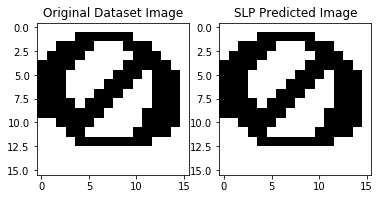

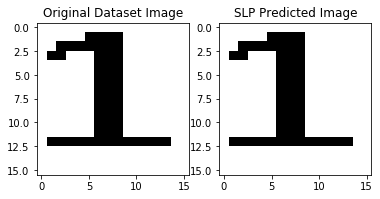

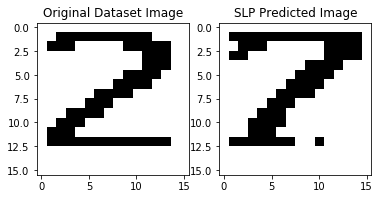

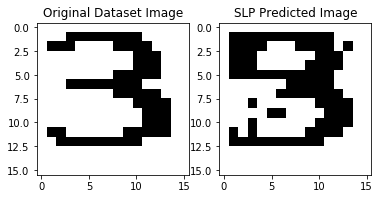

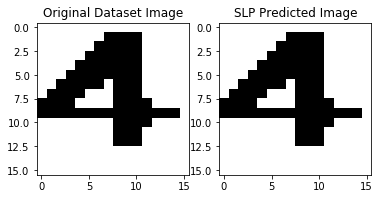

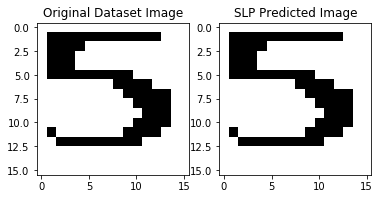

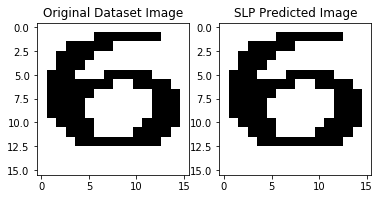

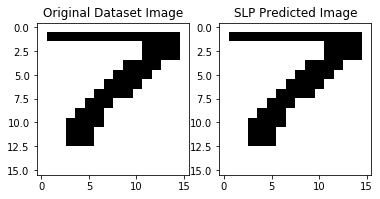

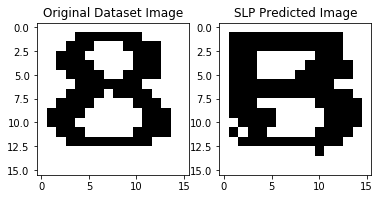

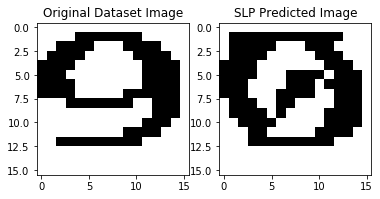

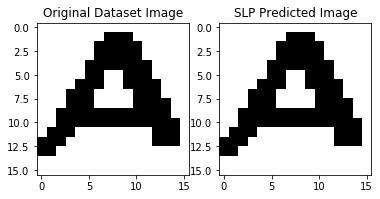

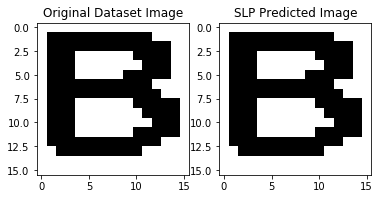

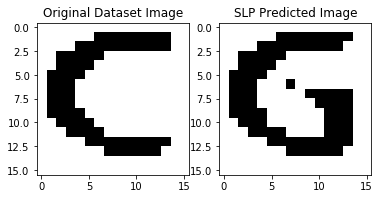

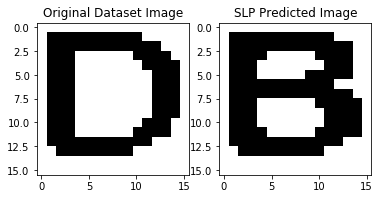

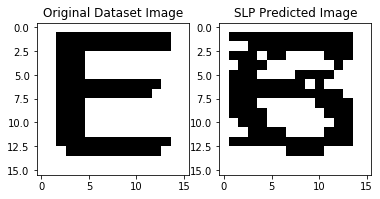

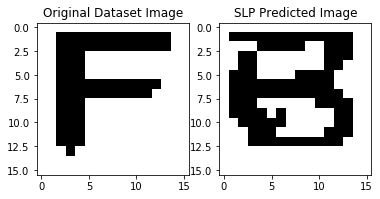

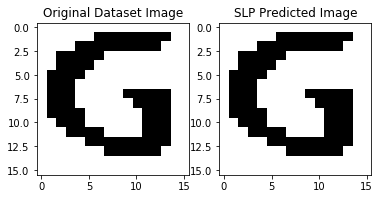

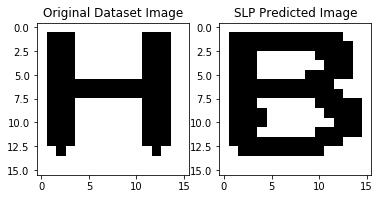

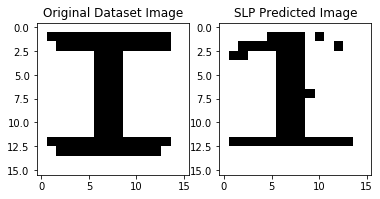

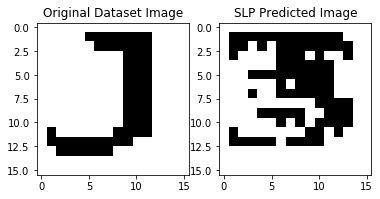

In [29]:
"""
converting the imageset into pure black and white images
the threshold value is the mean of all the pixels in the image
"""
y_pred = np.where(y_pred<np.mean(y_pred),0,1).astype('float64')
X_test = np.where(X_test<np.mean(X_test),0,1).astype('float64')
print(X_test.shape,y_pred.shape)

compare_results(X_test,y_pred)


## Training the SLP on the entire dataset

In [30]:
#training the model
results = model.fit(X_test,X_test, validation_split=0.1, epochs=500)

Train on 18 samples, validate on 2 samples
Epoch 1/500
18/18 [==============================] - 0s 562us/step - loss: 0.0544 - val_loss: 0.1052
Epoch 2/500
18/18 [==============================] - 0s 556us/step - loss: 0.0530 - val_loss: 0.1050
Epoch 3/500
18/18 [==============================] - 0s 634us/step - loss: 0.0507 - val_loss: 0.1051
Epoch 4/500
18/18 [==============================] - 0s 751us/step - loss: 0.0481 - val_loss: 0.1054
Epoch 5/500
18/18 [==============================] - 0s 655us/step - loss: 0.0456 - val_loss: 0.1057
Epoch 6/500
18/18 [==============================] - 0s 625us/step - loss: 0.0433 - val_loss: 0.1059
Epoch 7/500
18/18 [==============================] - 0s 590us/step - loss: 0.0415 - val_loss: 0.1059
Epoch 8/500
18/18 [==============================] - 0s 606us/step - loss: 0.0399 - val_loss: 0.1057
Epoch 9/500
18/18 [==============================] - 0s 659us/step - loss: 0.0387 - val_loss: 0.1057
Epoch 10/500
18/18 [============================

Epoch 82/500
18/18 [==============================] - 0s 626us/step - loss: 0.0100 - val_loss: 0.0965
Epoch 83/500
18/18 [==============================] - 0s 663us/step - loss: 0.0098 - val_loss: 0.0965
Epoch 84/500
18/18 [==============================] - 0s 662us/step - loss: 0.0097 - val_loss: 0.0964
Epoch 85/500
18/18 [==============================] - 0s 613us/step - loss: 0.0095 - val_loss: 0.0963
Epoch 86/500
18/18 [==============================] - 0s 615us/step - loss: 0.0094 - val_loss: 0.0963
Epoch 87/500
18/18 [==============================] - 0s 704us/step - loss: 0.0092 - val_loss: 0.0962
Epoch 88/500
18/18 [==============================] - 0s 656us/step - loss: 0.0091 - val_loss: 0.0961
Epoch 89/500
18/18 [==============================] - 0s 540us/step - loss: 0.0089 - val_loss: 0.0961
Epoch 90/500
18/18 [==============================] - 0s 601us/step - loss: 0.0088 - val_loss: 0.0960
Epoch 91/500
18/18 [==============================] - 0s 752us/step - loss: 0.0087

Epoch 162/500
18/18 [==============================] - 0s 662us/step - loss: 0.0039 - val_loss: 0.0928
Epoch 163/500
18/18 [==============================] - 0s 583us/step - loss: 0.0039 - val_loss: 0.0928
Epoch 164/500
18/18 [==============================] - 0s 602us/step - loss: 0.0038 - val_loss: 0.0928
Epoch 165/500
18/18 [==============================] - 0s 605us/step - loss: 0.0038 - val_loss: 0.0928
Epoch 166/500
18/18 [==============================] - 0s 598us/step - loss: 0.0038 - val_loss: 0.0928
Epoch 167/500
18/18 [==============================] - 0s 604us/step - loss: 0.0037 - val_loss: 0.0927
Epoch 168/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0037 - val_loss: 0.0927
Epoch 169/500
18/18 [==============================] - 0s 625us/step - loss: 0.0037 - val_loss: 0.0927
Epoch 170/500
18/18 [==============================] - 0s 578us/step - loss: 0.0036 - val_loss: 0.0927
Epoch 171/500
18/18 [==============================] - 0s 550us/step - loss

Epoch 242/500
18/18 [==============================] - 0s 625us/step - loss: 0.0023 - val_loss: 0.0914
Epoch 243/500
18/18 [==============================] - 0s 664us/step - loss: 0.0023 - val_loss: 0.0914
Epoch 244/500
18/18 [==============================] - 0s 653us/step - loss: 0.0023 - val_loss: 0.0913
Epoch 245/500
18/18 [==============================] - 0s 744us/step - loss: 0.0023 - val_loss: 0.0913
Epoch 246/500
18/18 [==============================] - 0s 664us/step - loss: 0.0022 - val_loss: 0.0913
Epoch 247/500
18/18 [==============================] - 0s 691us/step - loss: 0.0022 - val_loss: 0.0913
Epoch 248/500
18/18 [==============================] - 0s 676us/step - loss: 0.0022 - val_loss: 0.0913
Epoch 249/500
18/18 [==============================] - 0s 638us/step - loss: 0.0022 - val_loss: 0.0913
Epoch 250/500
18/18 [==============================] - 0s 640us/step - loss: 0.0022 - val_loss: 0.0913
Epoch 251/500
18/18 [==============================] - 0s 697us/step - lo

Epoch 322/500
18/18 [==============================] - 0s 584us/step - loss: 0.0015 - val_loss: 0.0915
Epoch 323/500
18/18 [==============================] - 0s 582us/step - loss: 0.0015 - val_loss: 0.0915
Epoch 324/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0915
Epoch 325/500
18/18 [==============================] - 0s 647us/step - loss: 0.0015 - val_loss: 0.0915
Epoch 326/500
18/18 [==============================] - 0s 631us/step - loss: 0.0015 - val_loss: 0.0915
Epoch 327/500
18/18 [==============================] - 0s 645us/step - loss: 0.0015 - val_loss: 0.0915
Epoch 328/500
18/18 [==============================] - 0s 805us/step - loss: 0.0015 - val_loss: 0.0915
Epoch 329/500
18/18 [==============================] - 0s 632us/step - loss: 0.0015 - val_loss: 0.0915
Epoch 330/500
18/18 [==============================] - 0s 551us/step - loss: 0.0015 - val_loss: 0.0915
Epoch 331/500
18/18 [==============================] - 0s 628us/step - loss

Epoch 402/500
18/18 [==============================] - 0s 605us/step - loss: 0.0011 - val_loss: 0.0903
Epoch 403/500
18/18 [==============================] - 0s 660us/step - loss: 0.0011 - val_loss: 0.0903
Epoch 404/500
18/18 [==============================] - 0s 568us/step - loss: 0.0011 - val_loss: 0.0903
Epoch 405/500
18/18 [==============================] - 0s 687us/step - loss: 0.0011 - val_loss: 0.0903
Epoch 406/500
18/18 [==============================] - 0s 647us/step - loss: 0.0010 - val_loss: 0.0903
Epoch 407/500
18/18 [==============================] - 0s 662us/step - loss: 0.0010 - val_loss: 0.0903
Epoch 408/500
18/18 [==============================] - 0s 629us/step - loss: 0.0010 - val_loss: 0.0903
Epoch 409/500
18/18 [==============================] - 0s 631us/step - loss: 0.0010 - val_loss: 0.0902
Epoch 410/500
18/18 [==============================] - 0s 573us/step - loss: 0.0010 - val_loss: 0.0902
Epoch 411/500
18/18 [==============================] - 0s 1ms/step - loss

Epoch 480/500
18/18 [==============================] - 0s 573us/step - loss: 8.6485e-04 - val_loss: 0.0901
Epoch 481/500
18/18 [==============================] - 0s 650us/step - loss: 8.6284e-04 - val_loss: 0.0901
Epoch 482/500
18/18 [==============================] - 0s 655us/step - loss: 8.6084e-04 - val_loss: 0.0901
Epoch 483/500
18/18 [==============================] - 0s 641us/step - loss: 8.5885e-04 - val_loss: 0.0901
Epoch 484/500
18/18 [==============================] - 0s 905us/step - loss: 8.5687e-04 - val_loss: 0.0901
Epoch 485/500
18/18 [==============================] - 0s 863us/step - loss: 8.5490e-04 - val_loss: 0.0901
Epoch 486/500
18/18 [==============================] - 0s 679us/step - loss: 8.5294e-04 - val_loss: 0.0901
Epoch 487/500
18/18 [==============================] - 0s 699us/step - loss: 8.5099e-04 - val_loss: 0.0901
Epoch 488/500
18/18 [==============================] - 0s 649us/step - loss: 8.4905e-04 - val_loss: 0.0901
Epoch 489/500
18/18 [================

In [31]:
#predicting output
y_pred = model.predict(X_test)

In [13]:
#saving the weights
model.save("Trained_20_img.h5")

(20, 1, 256) (20, 1, 256)


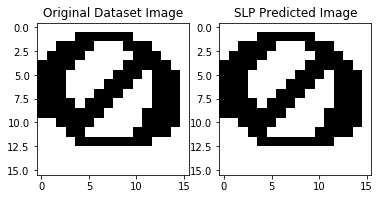

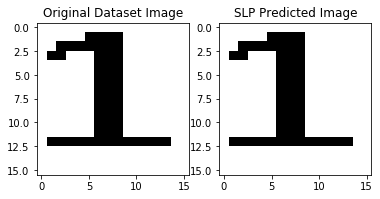

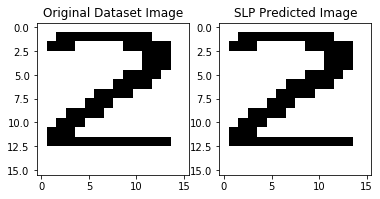

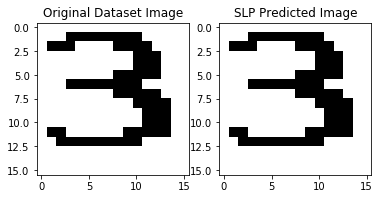

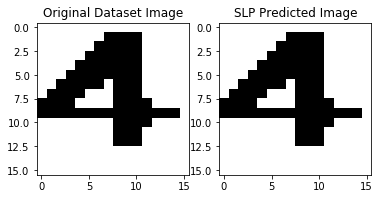

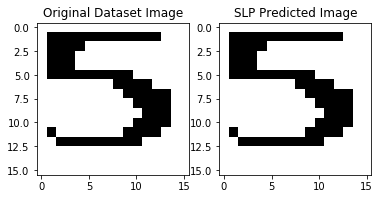

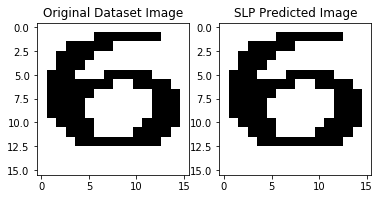

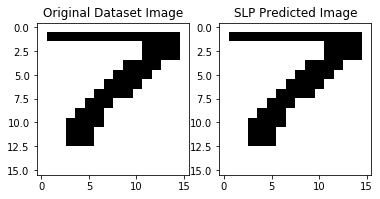

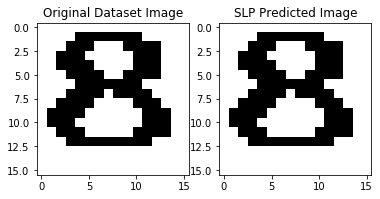

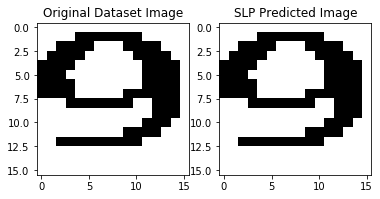

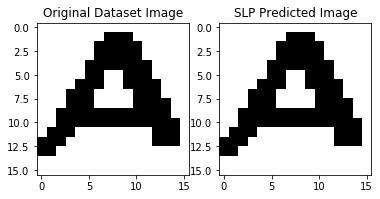

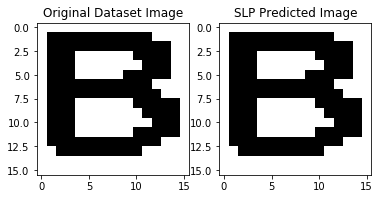

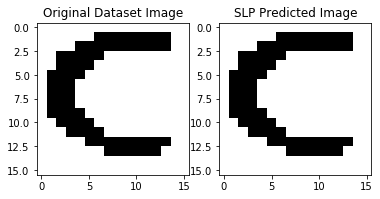

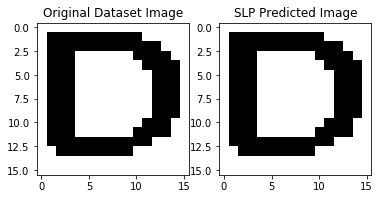

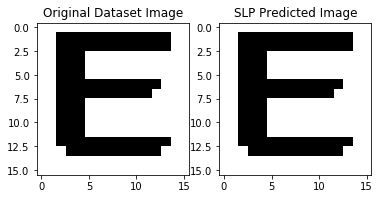

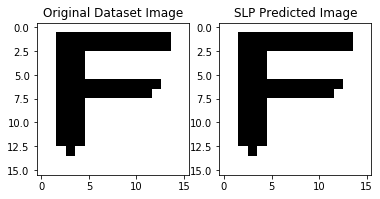

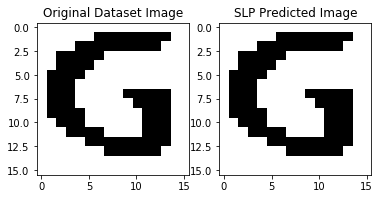

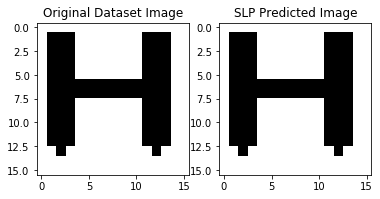

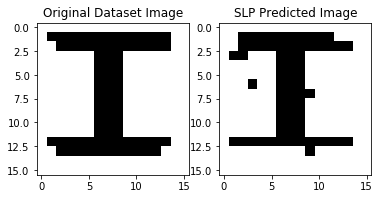

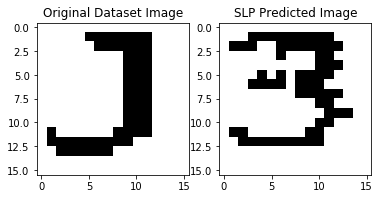

In [32]:
"""
converting the imageset into pure black and white images
the threshold value is the mean of all the pixels in the image
"""
y_pred = np.where(y_pred<np.mean(y_pred),0,1).astype('float64')
X_test = np.where(X_test<np.mean(X_test),0,1).astype('float64')
print(X_test.shape,y_pred.shape)

compare_results(X_test,y_pred)




# Introducing noise in the images

In [39]:
def add_gaussian_noise(seed_no,stddev,img):
    """
    Adding gaussian noise to 10% of the image pixels
    stddev: standard deviation
    img: image that needs to be corrupted with noise
    """
    random.seed(seed_no)
    rand_idx=[]
    for i in range(0,25):
        random_index1=np.random.choice(16)
        random_index2=np.random.choice(16)
        rand_idx.append([random_index1,random_index2])
        #print([random_index1,random_index2])
    #len(rand_idx)
    noise_pixels = np.ones([16,16],dtype="float64")
    gauss_noise = np.random.normal(0.0,stddev*0.5, [16,16])
    for i in rand_idx:
        noise_pixels[i[0]][i[1]] = gauss_noise[i[0]][i[1]]
    noisy_img = noise_pixels+img
    noisy_img = np.where(noisy_img<noisy_img.mean(),0,1).astype('float64')
    return noisy_img

In [40]:
def add_noise(stddev,datadir):
    img_set = get_imageset("../dataset/test/")
    #print(img_set.shape)
    for i in range(20):
        #print(i)
        gaussy_img = add_gaussian_noise(16,stddev,img_set[i])
        plt.imsave(datadir+str(i)+'.jpg', gaussy_img)
        #print("saved")
        #plt.imshow(ll,cmap="gray")

In [41]:
stddev_dir={0.1:'../dataset/noisy/dev1/',0.01:'../dataset/noisy/dev01/',0.02:'../dataset/noisy/dev02/',0.03:'../dataset/noisy/dev03/',0.05:'../dataset/noisy/dev05/',
           0.001:'../dataset/noisy/dev001/',0.002:'../dataset/noisy/dev002/',0.003:'../dataset/noisy/dev003/',0.005:'../dataset/noisy/dev005/'}
(stddev_dir[0.1])

'../dataset/noisy/dev1/'

In [34]:
y_pred = model.predict(X_test)
yp = np.where(y_pred<np.mean(y_pred),0,1).astype('float64')
xt = np.where(X_test<np.mean(X_test),0,1).astype('float64')

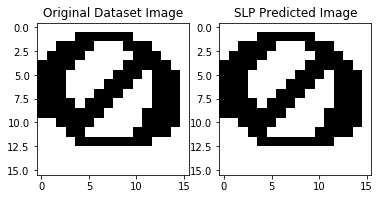

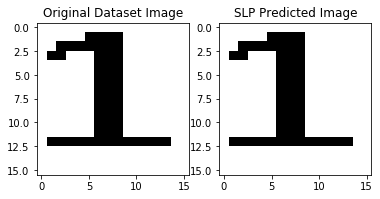

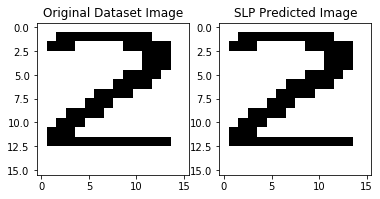

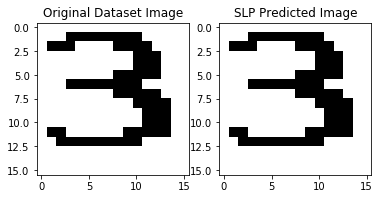

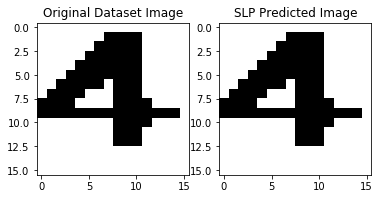

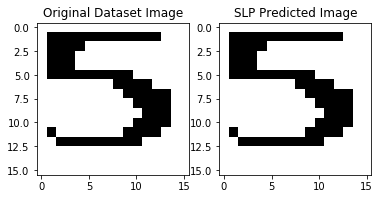

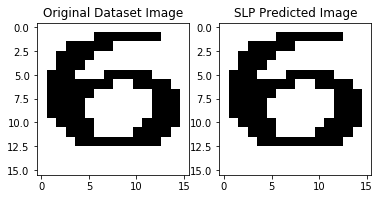

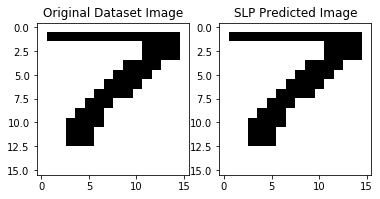

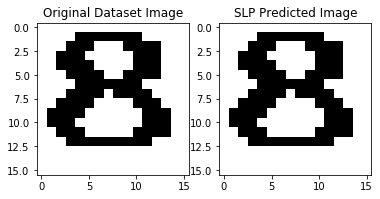

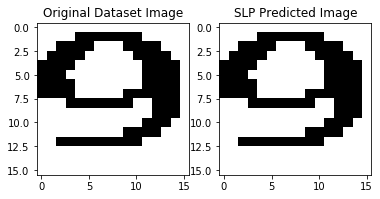

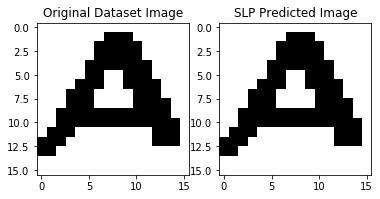

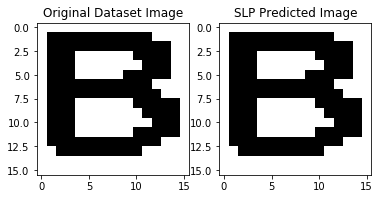

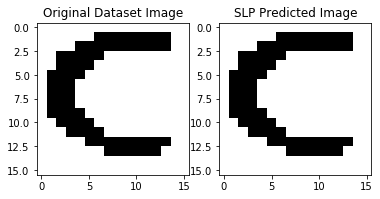

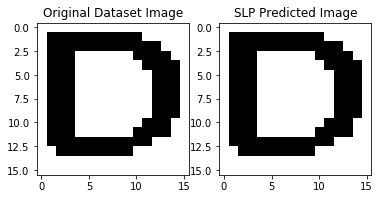

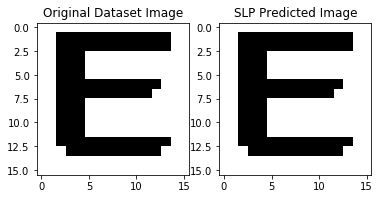

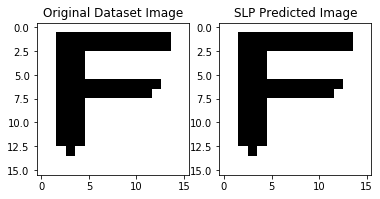

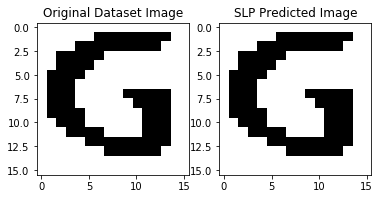

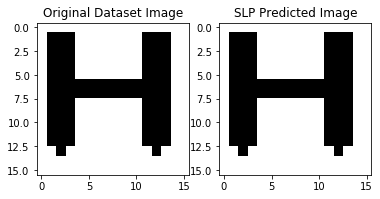

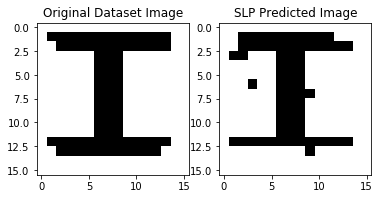

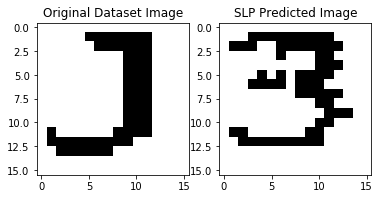

In [35]:
compare_results(xt,yp)

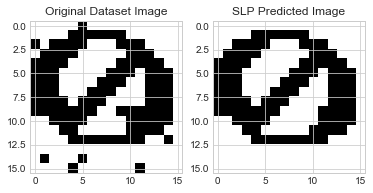

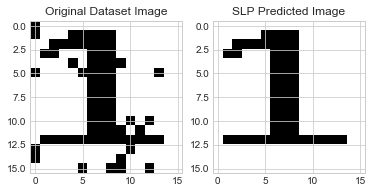

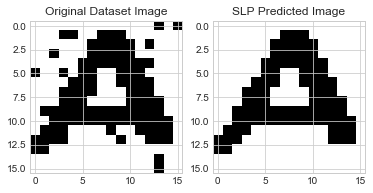

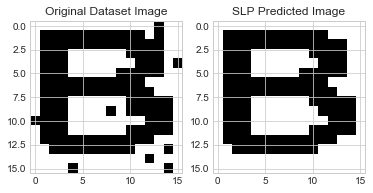

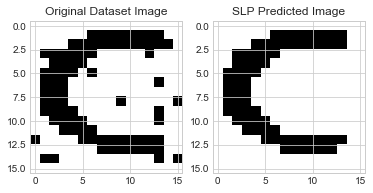

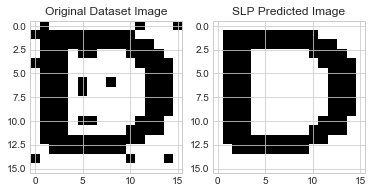

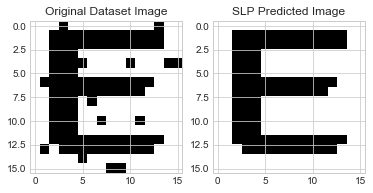

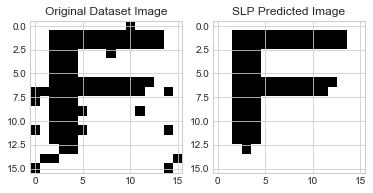

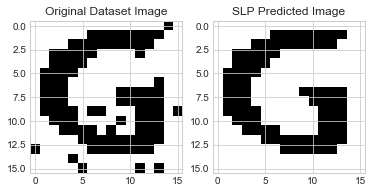

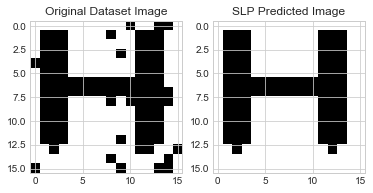

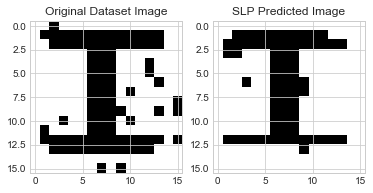

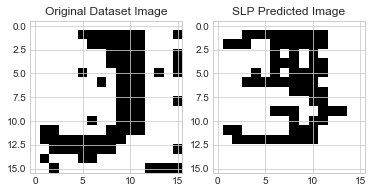

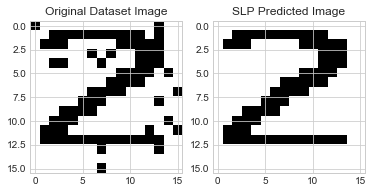

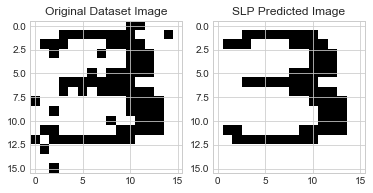

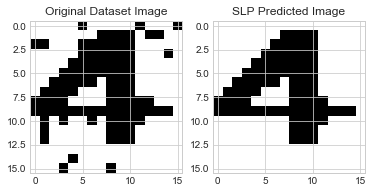

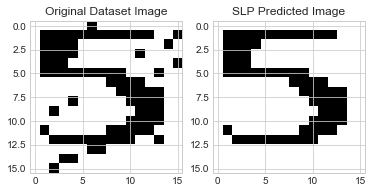

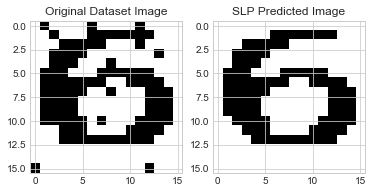

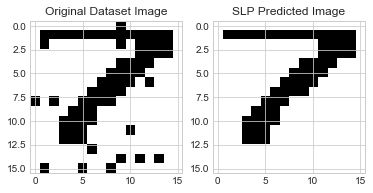

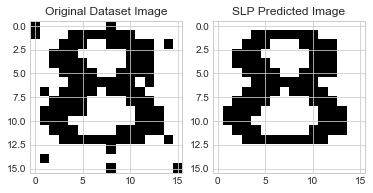

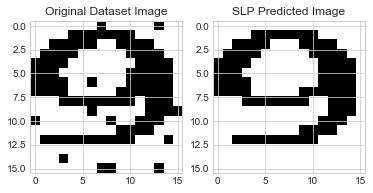

In [81]:
# testing the model on noisy data
X_test = get_imageset("../dataset/noisy/dev005/")
X_test = X_test.reshape(X_test.shape[0],1,256)
y_pred = model.predict(X_test)
yp = np.where(y_pred<np.mean(y_pred),0,1).astype('float64')
xt = np.where(X_test<np.mean(X_test),0,1).astype('float64')
compare_results(xt,yp)

## Calculating Fh anf Ffa

In [36]:
def metric_calculation(test,pred):
    """
    test: original image
    pred: predicted image
    n_inp_zeros: no. of white pixels in the original image
    n_inp_ones: no. of black pixels in the predicted image
    n_out_zeros: no. of white pixels in the original image
    n_out_ones: no. of black pixels in the predicted image
    
    ff = no. of black pixels that OCCUR in the correct position 
         corresponding to its original noiseless image/
         total no. of BLACK pixels in input image
    fha = no. of black pixels that DONOT OCCUR in the correct position 
         corresponding to its original noiseless image/
         total no. of WHITE pixels in input image
    """
    ff = []
    fha = []
    #print(pred[0])
    for i in range(test.shape[0]):
        n_inp_zeros = (test[i]==0).sum()
        n_inp_ones = (test[i]==1).sum()
        n_out_zeros = (pred[i]==0).sum()
        n_out_ones = (pred[i]==1).sum()
        ## and operation i performed to find no of black pixels that occur coorectly
        #and_op = np.logical_and(test[i],pred[i]).astype('float64')
        right_ones = (np.logical_and(test[i],pred[i]).astype('float64')==1).sum()
        #print(right_ones,n_inp_ones)
        ff.append(round(right_ones/n_inp_ones,2))
        #print("shs",ff)
        fha.append(abs(round((n_out_ones-right_ones)/n_inp_zeros,2)))
        #print(n_inp_zeros,n_inp_ones,n_out_zeros,n_out_ones)
    return ff,fha
    

In [37]:
X_test = get_imageset("../dataset/test/")
X_test = X_test.reshape(X_test.shape[0],1,256)
X_test = X_test.reshape(X_test.shape[0],16,16)
#y_pred = y_pred.reshape(X_test.shape[0],16,16)
y_pred = model.predict(X_test)
yp = np.where(y_pred<np.mean(y_pred),0,1).astype('float64')
xt = np.where(X_test<np.mean(X_test),0,1).astype('float64')
y_pred = np.where(y_pred<np.mean(y_pred),0,1).astype('float64')
X_test = np.where(X_test<np.mean(X_test),0,1).astype('float64')
fh,ffa = metric_calculation(X_test,y_pred)

In [38]:
metrics[0]=[fh,ffa]

In [82]:
X_test = get_imageset("../dataset/test/")
X_test = X_test.reshape(X_test.shape[0],1,256)
xt = np.where(X_test<np.mean(X_test),0,1).astype('float64')
fh,ffa = metric_calculation(xt,yp)
fh,ffa
metrics[0.005]=[fh,ffa]

In [42]:
for std in stddev_dir:
    add_noise(std,stddev_dir[std])
print("DOne")

DOne


In [83]:
metrics

{0: [[1.0,
   1.0,
   0.99,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.98,
   0.89],
  [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.17,
   0.28]],
 0.1: [[1.0,
   1.0,
   0.71,
   0.7,
   0.79,
   0.72,
   0.8,
   0.8,
   0.82,
   0.76,
   0.77,
   0.96,
   0.8,
   0.87,
   0.74,
   0.82,
   0.86,
   0.83,
   0.68,
   0.72],
  [0.0,
   0.0,
   0.56,
   0.06,
   0.62,
   0.31,
   0.37,
   0.44,
   0.38,
   0.45,
   0.68,
   0.48,
   0.61,
   0.54,
   0.61,
   0.56,
   0.28,
   0.7,
   0.62,
   0.47]],
 0.005: [[1.0,
   1.0,
   0.71,
   0.7,
   0.79,
   0.72,
   0.8,
   0.8,
   0.82,
   0.76,
   0.76,
   0.88,
   0.8,
   0.87,
   0.74,
   0.82,
   0.86,
   0.83,
   0.68,
   0.72],
  [0.0,
   0.0,
   0.56,
   0.06,
   0.62,
   0.31,
   0.37,
   0.44,
   0.38,
   0.45,
   0.68,
   0.56,
   0.61,
   0.54,
   0

## Plotting the graph

In [84]:
 %matplotlib inline
import matplotlib.pyplot as plt
import pylab

plt.style.use('seaborn-whitegrid')

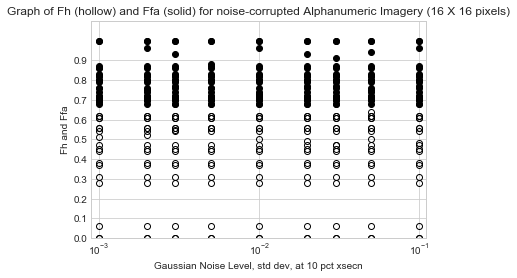

In [85]:
for i in range(0,20):
    plt.plot(0.001,metrics[0.001][0][i], 'o', color='black')
    plt.plot(0.001,metrics[0.001][1][i], 'o', color='black', markerfacecolor='none')
#---------------------------This is for the Standard deviation 0.002-----------------------------
    plt.plot(0.002,metrics[0.002][0][i], 'o', color='black')
    plt.plot(0.002,metrics[0.002][1][i], 'o', color='black', markerfacecolor='none')
#---------------------------This is for the Standard deviation 0.003----------------------------- 
    plt.plot(0.003,metrics[0.003][0][i], 'o', color='black')
    plt.plot(0.003,metrics[0.003][1][i], 'o', color='black', markerfacecolor='none')
#---------------------------This is for the Standard deviation 0.005-----------------------------
    plt.plot(0.005,metrics[0.005][0][i], 'o', color='black')
    plt.plot(0.005,metrics[0.005][1][i], 'o', color='black', markerfacecolor='none')
#---------------------------This is for the Standard deviation 0.01-----------------------------
    plt.plot(0.01,metrics[0.01][0][i], 'o', color='black')
    plt.plot(0.01,metrics[0.01][1][i], 'o', color='black', markerfacecolor='none')
#---------------------------This is for the Standard deviation 0.02-----------------------------
    plt.plot(0.02,metrics[0.02][0][i], 'o', color='black')
    plt.plot(0.02,metrics[0.02][1][i], 'o', color='black', markerfacecolor='none')
#---------------------------This is for the Standard deviation 0.03-----------------------------
    plt.plot(0.03,metrics[0.03][0][i], 'o', color='black')
    plt.plot(0.03,metrics[0.03][1][i], 'o', color='black', markerfacecolor='none')
#---------------------------This is for the Standard deviation 0.05-----------------------------
    plt.plot(0.05,metrics[0.05][0][i], 'o', color='black')
    plt.plot(0.05,metrics[0.05][1][i], 'o', color='black', markerfacecolor='none')
#---------------------------This is for the Standard deviation 0.1------------------------------
    plt.plot(0.1,metrics[0.1][0][i], 'o', color='black')
    plt.plot(0.1,metrics[0.1][1][i], 'o', color='black', markerfacecolor='none')
    
#--------------The x axis is logarithmically scaled as mentioned in the  requirements----------------    
plt.xscale('log')
plt.yticks(np.arange(0,1,0.1))
plt.xlim([0.0009,0.1101])
plt.ylim([0,1.1])
#--------------Naming of the graph------------------
plt.xlabel('Gaussian Noise Level, std dev, at 10 pct xsecn')
plt.ylabel('Fh and Ffa')
plt.title('Graph of Fh (hollow) and Ffa (solid) for noise-corrupted Alphanumeric Imagery (16 X 16 pixels)')
plt.show()